In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)


def compute_mean(cluster, height, k):
    """
    Computes the mean (centers) of k clusters 
    -----
    args cluster: the array of cluster values
    args height: size of original data
    args k: number of clusters
    """
    sums = np.zeros((2,2))
    centers = np.zeros((k,2))
    count_0 = 0
    count_1 = 0
    for i in range(height):
        if(cluster[i] == 0):
            sums[0][0] += data[i][0] 
            sums[0][1] += data[i][1]
            count_0 += 1
        else:
            sums[1][0] += data[i][0] 
            sums[1][1] += data[i][1]
            count_1 += 1

    centers[0][0] = sums[0][0] / count_0
    centers[0][1] = sums[0][1] / count_0
    centers[1][0] = sums[1][0] / count_1
    centers[1][1] = sums[1][1] / count_1
    
    return centers

def k_means(img, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    height, width, ch = img.shape
    
    # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    centers = np.random.random_sample((k, ch))*255
    
    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Arr shape = (K, height, width), where K is cluster group
        clusters = calc_distance(img, centers)
        cluster_iter.append(clusters)
        
        # 3. Compute new mean for each cluster 
        new_centers = np.empty(shape=(k, ch))
        for j in range(k):
            np.mean(img[clusters[0]==j], axis=0, out=new_centers[j])
            
        # If new centers and centers are the same, exit iteration
        if((centers == new_centers).all()):
            break
        else:
            centers = new_centers
            
    return cluster_iter
    
def calc_distance(points, centers):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    dists = []
    # Calculate the distance between each point and each center
    for center in centers:
        dists.append([points - center])
    dists = np.linalg.norm(dists, axis=-1)
    
    # Return closest center of each point
    return np.argmin(dists, axis=0)
   
def show_plot(imgs, cols=3, isGray = False):  
    for i in range(len(imgs)):
        plt.figure(figsize=(20, 4))
        if(i==5):
            plt.title("Final Iteration")
        else:
            plt.title("Iteration number: "+str(i))
        plt.axis('off')
        if(isGray):
            plt.imshow(imgs[i][0].astype(np.uint8), cmap='gray')
        else:
            plt.imshow(imgs[i][0].astype(np.uint8))
        plt.show()  
        
def show_figures(imgs, isGray = False, isEM = False):
    """
    Plots figures in groups of three
    -----
    args imgs: array of images to be shown
    args isGray: if cmap = gray or not, defaulted to false
    """
    length = len(imgs)
    arr = [131, 132, 133]
    
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        
        if(not isEM and isGray):
            plt.imshow(imgs[i][0].astype(np.uint8), cmap='gray')
        elif(not isEM):
            plt.imshow(imgs[i][0].astype(np.uint8))
        elif(isGray):
            plt.imshow(imgs[i].astype(np.uint8),  cmap='gray')
        else:
            plt.imshow(imgs[i][0].astype(np.uint8))
        
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()

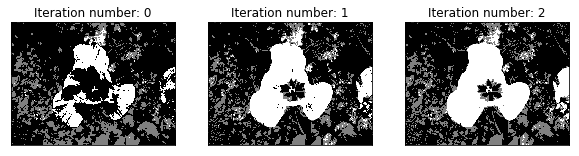

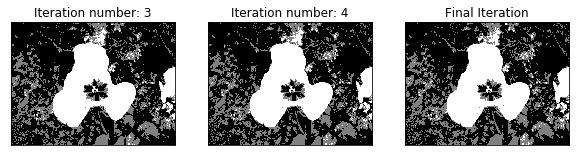

In [21]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img)
clusters = k_means(img_gray, 3, 6)
show_figures(clusters, isGray = True)

In [ ]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img)
clusters = k_means(img_gray, 2, 6)
show_figures(clusters, isGray = True)